In [22]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [23]:
from helper import load_data, normalize_data

data = load_data()
(N, d) = data.shape
print("Number of data points: ", N)
print("Dimension of each data point: ", d)

Number of data points:  272
Dimension of each data point:  2


### Initialize your cluster centers

In [24]:
import numpy as np

def initialize_clusters(data, k):
    """randomly initialize the k cluster centers (the means). Make sure you choose k clusters from the data itself,
             or ensure otherwise that your initializations have the same scale as the data

    Args:
        data: shape = (N, d). original data.
        k: integer number. predefined number of clusters for the k-means algorithm.
    Returns:
        numpy array with shape (k, d) which corresponds to the k initial clusters.
    """
    # Get the number of rows in the data matrix
    N = data.shape[0]
    
    # Randomly select k indices from the range [0, N) without replacement
    cluster_indices = np.random.choice(N, k, replace=False)
    
    # Select the corresponding rows from the data matrix as the cluster centers
    cluster_centers = data[cluster_indices]
    
    return cluster_centers


### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [25]:
def build_distance_matrix(data, mu):
    """builds a distance matrix.

    Args:
        data: numpy array of shape = (N, d). original data.
        mu:   numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        numpy array of shape (N, k):
            squared distances matrix,
            the value row i column j corresponds to the squared distance of datapoint i with cluster center j.
    """
    ####################################
    ### ___ Enter your code here ___ ###
    ####################################
    distance_matrix = np.zeros((data.shape[0], mu.shape[0]))
    for i in range(data.shape[0]):
        for j in range(mu.shape[0]):
            distance_matrix[i, j] = np.sqrt((mu[j, 0] - data[i, 0]) ** 2 + (mu[j, 1] - data[i, 1]) ** 2)    

    return distance_matrix


#### Update k-means parameters

In [26]:
def update_kmeans_parameters(data, mu_old):
    """compute one step of the kmeans algorithm: using mu_old, find to which cluster each datapoint belongs to,
            then update the parameter cluster centers.

    Args:
        data:   numpy array of shape = (N, d). original data.
        mu_old: numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        losses: shape (N, ), contains the (old) squared distances of each data point to its (old) cluster mean (computed from mu_old).
        assignments: vector of shape (N, ) which contains the cluster associated to each data point.
        mu: updated vector mu of shape (k, d) where each row corresponds to the new cluster center.
    """
    ####################################
    ### ___ Enter your code here ___ ###
    ####################################
    
    distance_matrix = build_distance_matrix(data, mu_old)
    assignments = np.argmin(distance_matrix, axis=1)
    losses = np.min(distance_matrix, axis=1)
    mu = np.zeros(mu_old.shape)
    for i in range(mu_old.shape[0]):
        mu[i, :] = np.mean(data[assignments == i, :], axis=0)
    return losses, assignments, mu
        
    

#### Play with k-means

The current iteration of k-means is: 0,                    the average loss is 15.541600216922385.


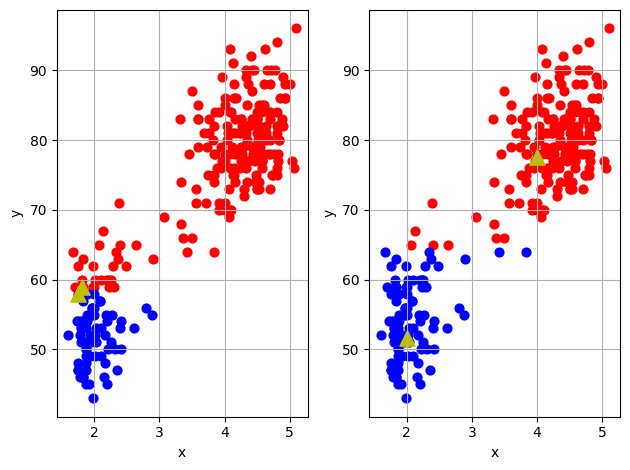

The current iteration of k-means is: 1,                    the average loss is 5.074883551540969.


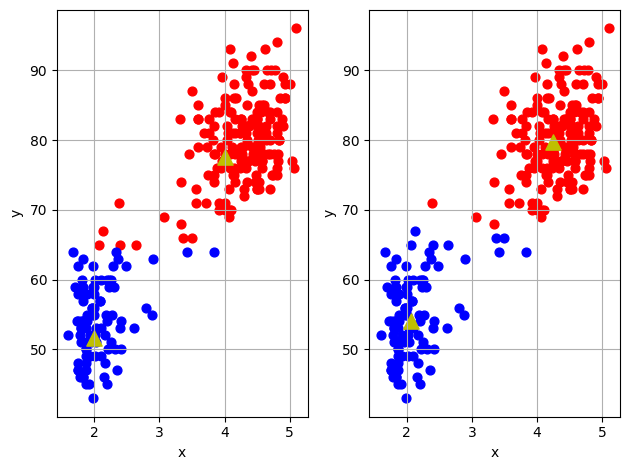

The current iteration of k-means is: 2,                    the average loss is 4.677073863010274.


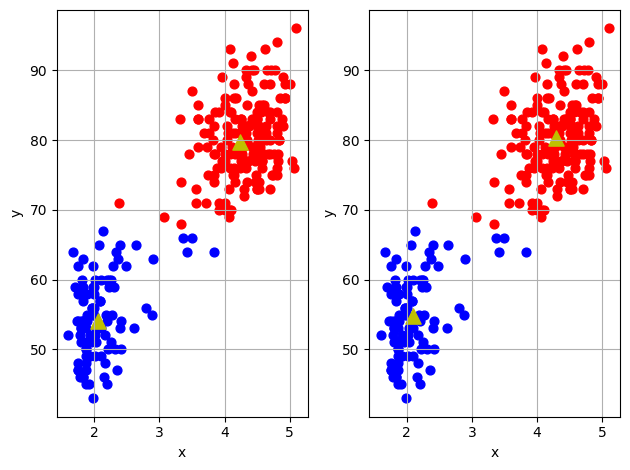

The current iteration of k-means is: 3,                    the average loss is 4.68244411160236.


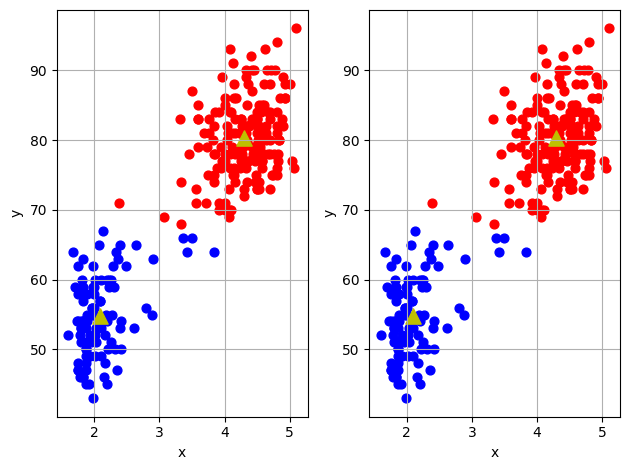

The current iteration of k-means is: 4,                    the average loss is 4.68244411160236.


In [27]:
from helper import build_dir
from plots import plot


def kmeans(data, k, max_iters, threshold, verbose=True):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if verbose:
            print(
                "The current iteration of k-means is: {i}, \
                   the average loss is {l}.".format(
                    i=iteration, l=average_loss
                )
            )
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        if verbose:
            plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu
    return average_loss


# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
average_loss = kmeans(data, k, max_iters, threshold)

### Plotting the loss as a function of number of clusters

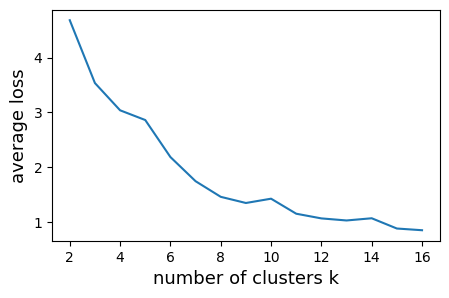

In [28]:
# don't worry about empty slice warnings
import warnings

warnings.filterwarnings("ignore")

losses = []
ks = np.arange(2, 17)
for k in ks:
    average_loss = kmeans(data, k, max_iters, threshold, verbose=False)
    losses += [average_loss]
plt.figure(figsize=(5, 3))
plt.xlabel("number of clusters k", fontsize=13)
plt.ylabel("average loss", fontsize=13)
plt.plot(ks, losses)
plt.show()

## Using k-means for image compresson

#### load image

In [29]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype
    )
)

Original image: the shape of image=(480, 480, 3), the data type=float32.


#### preprocess image

In [35]:
def preprocess_image(original_image):
    """preprocess the image.
    vectorize the three matrices (each matrix corresponds to a RGB color channel). **don't normalize!**

    Args:
        original_image: numpy array of shape (480, 480, 3)
    Returns:
        processed_image: numpy array of shape (480*480, 3)
    """
    ####################################
    ### ___ Enter your code here ___ ###
    ####################################
    processed_image = original_image.reshape((original_image.shape[0] * original_image.shape[1], 3))

    processed_image = processed_image.astype(float)
    print(
        "Current image: the shape of image={s}, the data type={dt}.".format(
            s=processed_image.shape, dt=processed_image.dtype
        )
    )
    return processed_image

processed_image = preprocess_image(original_image)

Current image: the shape of image=(230400, 3), the data type=float64.


The current iteration of k-means is: 0,                    the average loss is 0.1818093972685197.
The current iteration of k-means is: 10,                    the average loss is 0.09032005302951701.
The current iteration of k-means is: 20,                    the average loss is 0.0903111725479111.
The current iteration of k-means is: 30,                    the average loss is 0.09031014356112262.


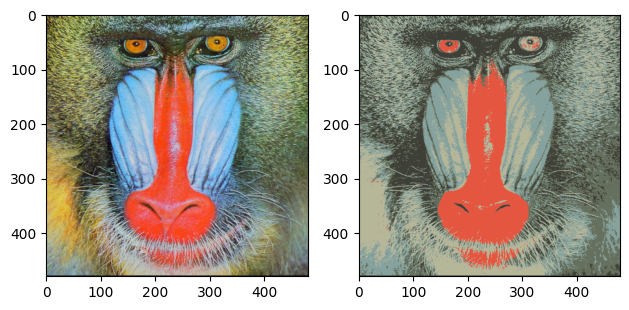

In [39]:
from plots import plot_image_compression


def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression.
    Args:
        original_image: numpy array of shape (480, 480, 3).
        processed_image: numpy array of shape (480*480, 3).
        k: scalar. Number of clusters.
        max_iters: integer. Max number of iterations for the kmeans algorithm.
        threshold: scalar. Stop the kmeans algorithm if the loss decrease between two iterations
                        is lower than the threshold.
    """

    ####################################
    ### ___ Enter your code here ___ ###
    ####################################
    #run kmeans algorithm
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if max_iters > 10 and iteration % 10 == 0:
            print(
                "The current iteration of k-means is: {i}, \
                   the average loss is {l}.".format(
                    i=iteration, l=average_loss
                )
            )
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # update k-means information.
        mu_old = mu
    


    
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)


# define parameters
k = 5
max_iter = 100
threshold = 1e-7

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)